In [15]:
   !pip install scikit-learn

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import os


In [17]:
folder_path = "ML files"
file_path = os.path.join(folder_path, 'homepricesd1.csv')
df = pd.read_csv(file_path)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


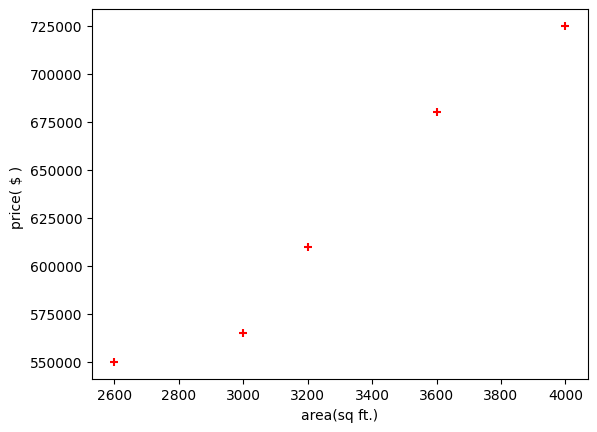

In [18]:
%matplotlib inline
plt.xlabel("area(sq ft.)")
plt.ylabel("price( $ ) ")
plt.scatter(df.area,df.price , color="red", marker = "+")

In [19]:
# ***** Training a model

reg = linear_model.LinearRegression()  # object made

reg.fit(df[['area']],df.price)

LinearRegression()

In [20]:
# testing model

reg.predict([[3000]]) # predict price for 3000 sqft

C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [21]:
# we have an equation >> y(predicitng value:price) = mx+c where m = coef_(slope)and x is inputvalue(area) and b is intercept
reg.coef_ 


array([135.78767123])

In [22]:
reg.intercept_

np.float64(180616.43835616432)

In [23]:
 # price =m * area + b
135.78767123 * 3000 + 180616.43835616432

587979.4520461643

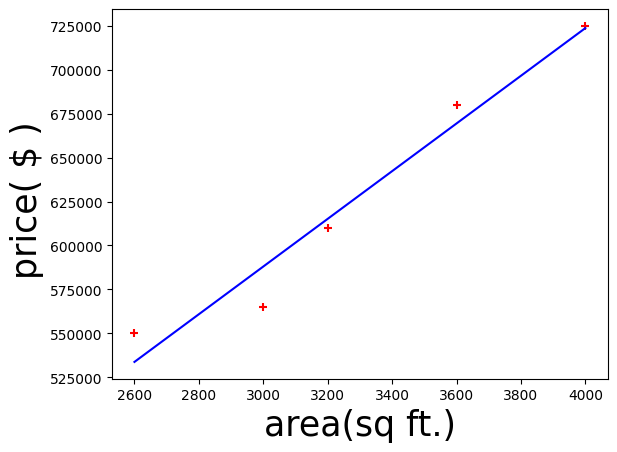

In [24]:
%matplotlib inline
plt.xlabel("area(sq ft.)" , fontsize=25)
plt.ylabel("price( $ ) " , fontsize=25)
plt.scatter(df.area,df.price , color="red", marker = "+")
plt.plot(df.area,reg.predict(df[['area']]),color="blue")

In [25]:

# another data containg many area and predicting their price at one and then making a csv file

folder_path = "ML files"
file_path = os.path.join(folder_path, 'areasd1.csv')
df_new = pd.read_csv(file_path)
df_new


,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [26]:
price = reg.predict(df_new)

In [27]:
df_new['price'] = price

In [28]:
df_new.to_csv("Predicted_prices_d1.csv",index=False)

In [34]:
# how to save a Trained model to a File
#method 01

import pickle 
with open('model_pickle','wb') as f:
 pickle.dump(reg,f)
with open('model_pickle','rb') as f:
 mp = pickle.load(f)
    
mp.predict([[4000]])


C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([723767.12328767])

In [37]:
#method 01 ( useful for large dataset of arrays)
import joblib
joblib.dump(reg , "model_joblib")
mj = joblib.load("model_joblib")
mj.predict([[4000]])

C:\Users\SaLaar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([723767.12328767])